In [35]:
from analisis_grupos import best_of_three_clean, best_of_five_clean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
best_of_three = best_of_three_clean.copy()
best_of_five = best_of_five_clean.copy()

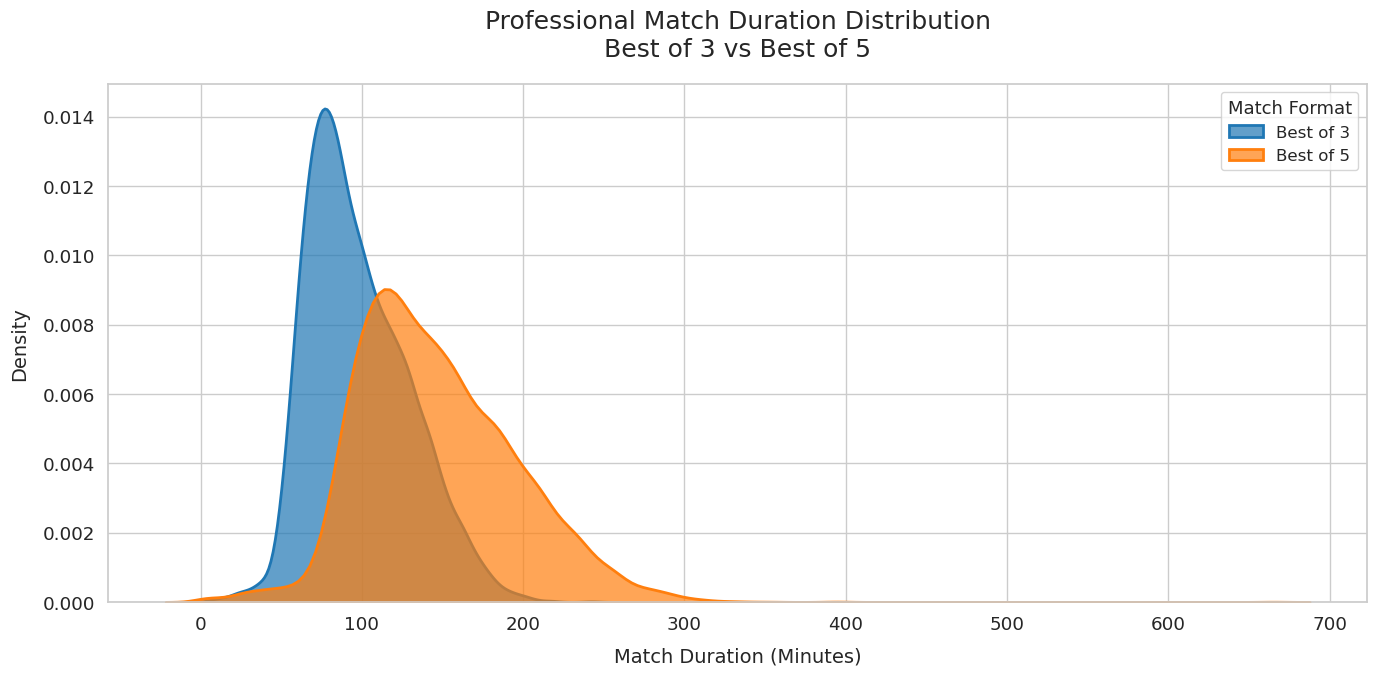

In [37]:

# ...existing code...

sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(14, 7))

# Plot distributions
sns.kdeplot(
    best_of_three["minutes"], 
    fill=True, 
    color="#1f77b4", 
    label="Best of 3", 
    linewidth=2, 
    alpha=0.7
)
sns.kdeplot(
    best_of_five["minutes"], 
    fill=True, 
    color="#ff7f0e", 
    label="Best of 5", 
    linewidth=2, 
    alpha=0.7
)

plt.xlabel("Match Duration (Minutes)", fontsize=14, labelpad=10)
plt.ylabel("Density", fontsize=14, labelpad=10)
plt.title("Professional Match Duration Distribution\nBest of 3 vs Best of 5", fontsize=18, pad=20)
plt.legend(title="Match Format", fontsize=12, title_fontsize=13, loc="upper right", frameon=True)
plt.tight_layout()
plt.show()
# ...existing code...

In [38]:
from scipy import stats
# Normality tests for best_of_three
print("Best of 3:")
shapiro_3 = stats.shapiro(best_of_three["minutes"])
dagostino_3 = stats.normaltest(best_of_three["minutes"])
print(f"Shapiro-Wilk Test: statistic={shapiro_3.statistic:.4f}, p-value={shapiro_3.pvalue:.4f}")
print(f"D'Agostino-Pearson Test: statistic={dagostino_3.statistic:.4f}, p-value={dagostino_3.pvalue:.4f}")

# Normality tests for best_of_five
print("\nBest of 5:")
shapiro_5 = stats.shapiro(best_of_five["minutes"])
dagostino_5 = stats.normaltest(best_of_five["minutes"])
print(f"Shapiro-Wilk Test: statistic={shapiro_5.statistic:.4f}, p-value={shapiro_5.pvalue:.4f}")
print(f"D'Agostino-Pearson Test: statistic={dagostino_5.statistic:.4f}, p-value={dagostino_5.pvalue:.4f}")


Best of 3:
Shapiro-Wilk Test: statistic=0.9713, p-value=0.0000
D'Agostino-Pearson Test: statistic=699.5239, p-value=0.0000

Best of 5:
Shapiro-Wilk Test: statistic=0.9756, p-value=0.0000
D'Agostino-Pearson Test: statistic=888.8398, p-value=0.0000


/home/cord2108/miniconda3/envs/myenv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14102.
  res = hypotest_fun_out(*samples, **kwds)
/home/cord2108/miniconda3/envs/myenv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10982.
  res = hypotest_fun_out(*samples, **kwds)


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_cols_3 = best_of_three.select_dtypes(include='number')
numeric_cols_5 = best_of_five.select_dtypes(include='number')

# Compute correlation matrices
corr_matrix_3 = numeric_cols_3.corr()
corr_matrix_5 = numeric_cols_5.corr()

# Sort correlations with 'minutes' only
correlations_with_minutes_3 = corr_matrix_3["minutes"].sort_values(key=abs, ascending=False)
correlations_with_minutes_5 = corr_matrix_5["minutes"].sort_values(key=abs, ascending=False)

print("Top correlations with 'minutes' (Best of 3):")
print(correlations_with_minutes_3)

print("\nTop correlations with 'minutes' (Best of 5):")
print(correlations_with_minutes_5)


Top correlations with 'minutes' (Best of 3):
minutes               1.000000
loser_rank_points     0.143025
match_num             0.101365
loser_rank           -0.070191
l_avg_bpFaced        -0.054376
l_avg_df             -0.044882
w_avg_ace            -0.043729
rank_diff            -0.042748
winner_age            0.042302
close_ranking         0.040039
loser_ht              0.039247
l_avg_bpSaved        -0.037260
draw_size             0.037246
l_avg_1stWon          0.036632
avg_age               0.035088
winner_rank           0.034954
avg_rank             -0.034129
l_avg_2ndWon         -0.033615
w_avg_df             -0.028104
w_avg_2ndWon         -0.025508
w_avg_bpFaced         0.021695
l_avg_svpt           -0.018620
l_avg_1stIn           0.017102
winner_ht            -0.016691
w_avg_bpSaved         0.012229
age_diff              0.011960
w_avg_SvGms          -0.011721
w_avg_1stIn           0.011615
loser_age             0.010031
w_avg_1stWon         -0.009415
l_avg_ace             0.0

# Aqui solo nos vamos a enfocar en los grand slams

✅ surface found — dtype: object, unique values: 3

🔄 Applying one-hot encoding...
✅ One-hot encoding successful.

📐 Shape after encoding: (10896, 35)
🧼 Column types: float64    34
int64       1
Name: count, dtype: int64

✅ All columns are numeric and ready for modeling.
✅ Rows after dropping NaNs: 10848
✅ Rows after removing outliers: 10746


/tmp/ipykernel_72307/1181136730.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=minutes_corr.values, y=minutes_corr.index, palette='coolwarm')


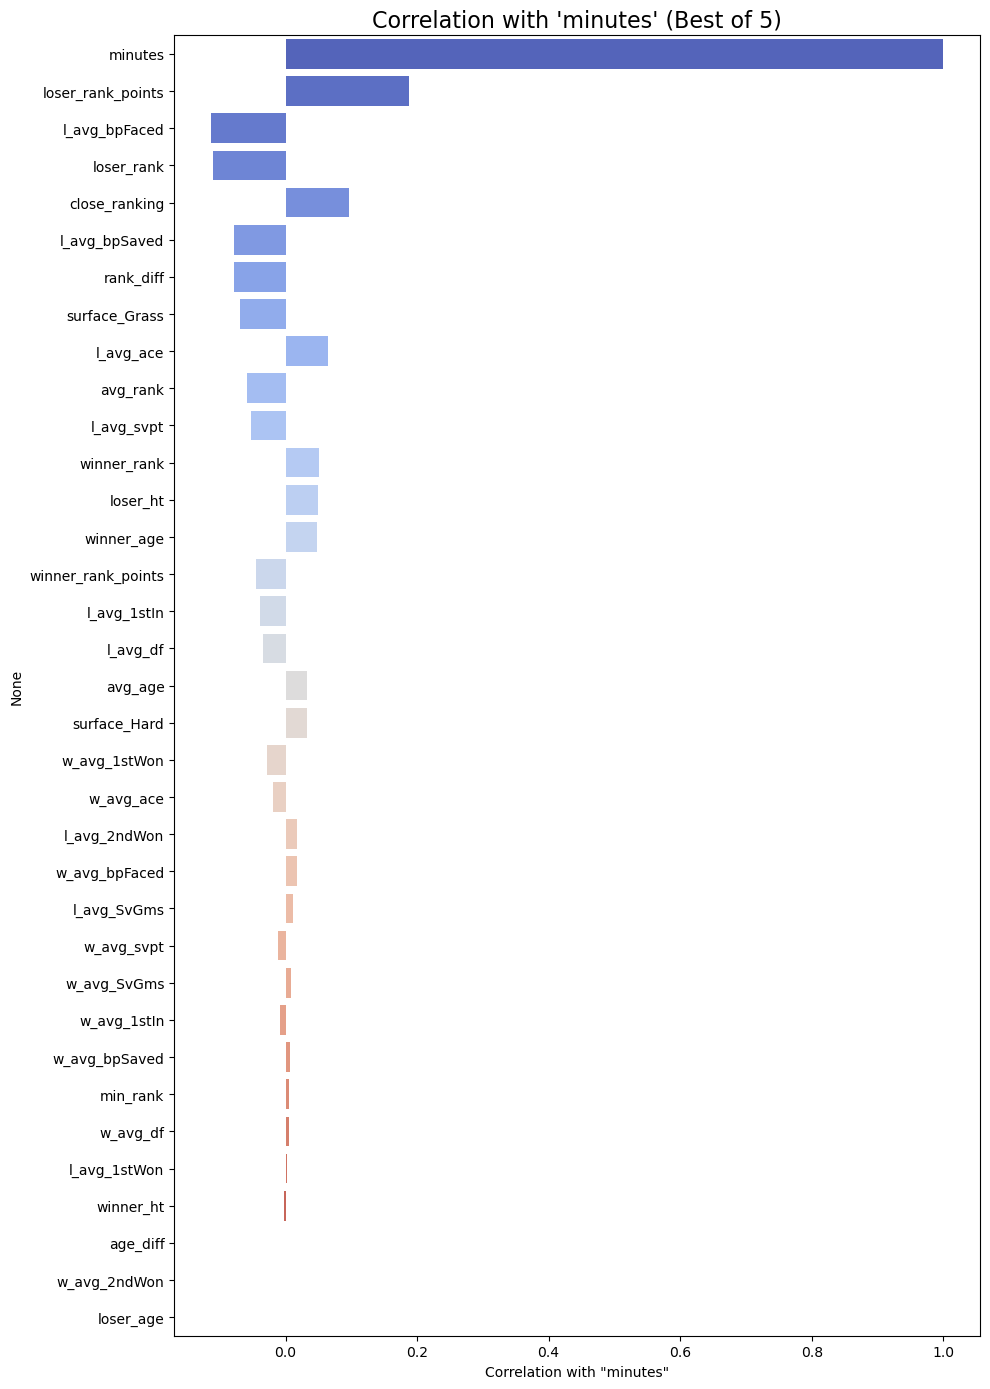

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from limpieza_grand_slam import X_design_5, corr_5, X_no_outliers, y_no_outliers

# === Function: plot correlation with 'minutes' ===
def plot_target_corr(corr_matrix, title):
    minutes_corr = corr_matrix['minutes'].sort_values(key=abs, ascending=False)
    plt.figure(figsize=(10, 14))
    sns.barplot(x=minutes_corr.values, y=minutes_corr.index, palette='coolwarm')
    plt.title(title, fontsize=16)
    plt.xlabel('Correlation with "minutes"')
    plt.tight_layout()
    plt.show()

corr_5 = X_design_5.corr()
plot_target_corr(corr_5, "Correlation with 'minutes' (Best of 5)")



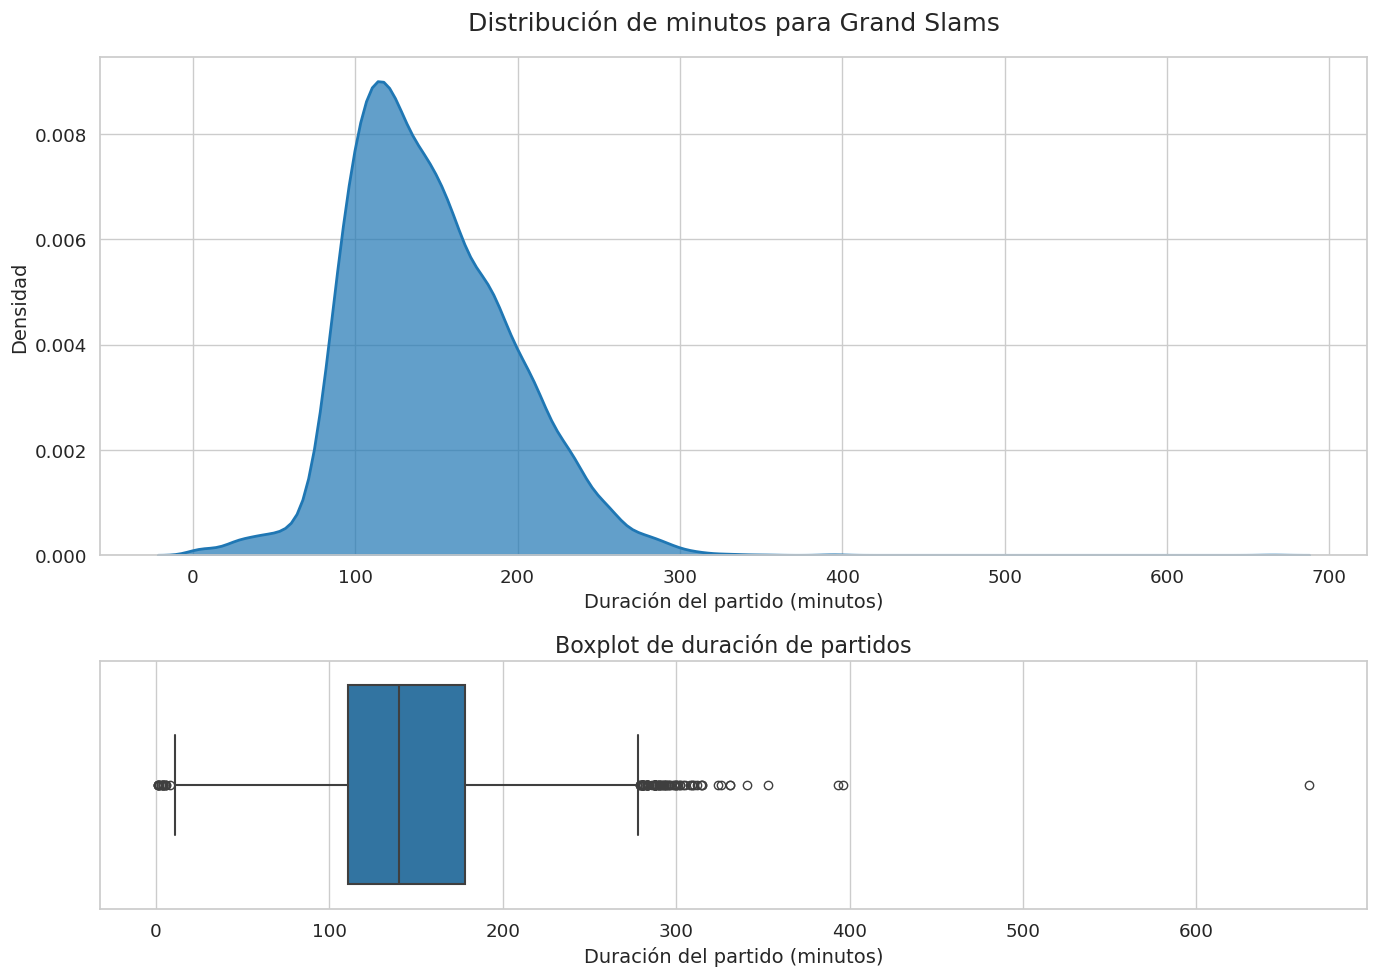

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)

# === KDE and Box Plot side-by-side ===
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), gridspec_kw={'height_ratios': [2, 1]})

# === KDE Plot ===
sns.kdeplot(
    data=X_design_5, 
    x="minutes", 
    fill=True, 
    color="#1f77b4", 
    linewidth=2, 
    alpha=0.7, 
    ax=axes[0]
)
axes[0].set_title("Distribución de minutos para Grand Slams", fontsize=18, pad=20)
axes[0].set_xlabel("Duración del partido (minutos)", fontsize=14)
axes[0].set_ylabel("Densidad", fontsize=14)

# === Box Plot ===
sns.boxplot(
    data=X_design_5, 
    x="minutes", 
    color="#1f77b4", 
    linewidth=1.5, 
    ax=axes[1]
)
axes[1].set_xlabel("Duración del partido (minutos)", fontsize=14)
axes[1].set_title("Boxplot de duración de partidos", fontsize=16)

plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     24.71
Date:                Tue, 20 May 2025   Prob (F-statistic):          6.92e-136
Time:                        20:54:03   Log-Likelihood:                -56083.
No. Observations:               10746   AIC:                         1.122e+05
Df Residuals:                   10714   BIC:                         1.125e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 95.3262     22

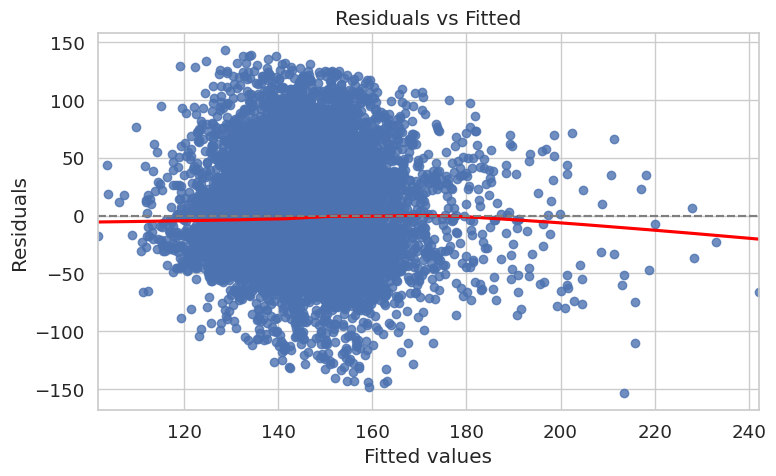

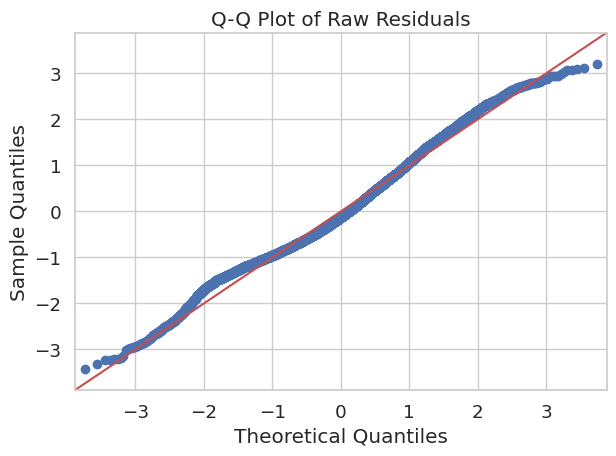

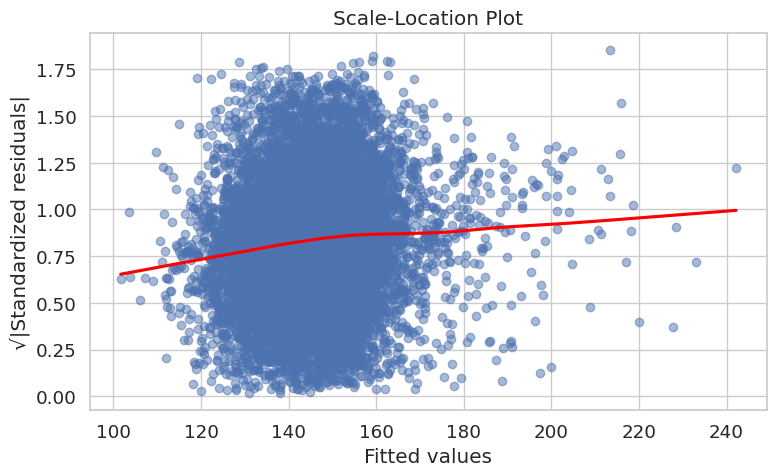

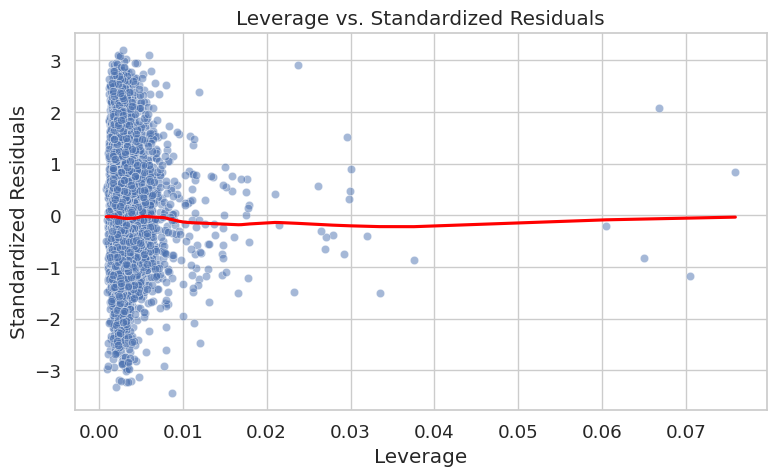

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

# === Step 4: Add intercept and fit OLS model ===
X_const = sm.add_constant(X_no_outliers)
model = sm.OLS(y_no_outliers, X_const).fit()

# === Step 5: Print model summary ===
print(model.summary())

# === Step 6: Extract residuals and predictions ===
fitted_vals = model.fittedvalues
residuals = model.resid
standardized_resid = model.get_influence().resid_studentized_internal
leverage = model.get_influence().hat_matrix_diag

# === Step 7: Diagnostic Plots ===

# 1. Residuals vs Fitted
plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.axhline(0, linestyle='--', color='gray')
plt.tight_layout()
plt.show()

# 2. Q-Q Plot (Raw residuals)
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Raw Residuals")
plt.tight_layout()
plt.show()

# 3. Scale-Location Plot
plt.figure(figsize=(8, 5))
plt.scatter(fitted_vals, np.sqrt(np.abs(standardized_resid)), alpha=0.5)
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(standardized_resid)),
            lowess=True, scatter=False, line_kws={'color': 'red'})
plt.xlabel("Fitted values")
plt.ylabel("√|Standardized residuals|")
plt.title("Scale-Location Plot")
plt.tight_layout()
plt.show()

# 4. Leverage vs Standardized Residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=leverage, y=standardized_resid, alpha=0.5)
sns.regplot(x=leverage, y=standardized_resid, scatter=False, lowess=True, line_kws={"color": "red"})
plt.xlabel("Leverage")
plt.ylabel("Standardized Residuals")
plt.title("Leverage vs. Standardized Residuals")
plt.tight_layout()
plt.show()


In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = sm.add_constant(X_no_outliers)  # Use cleaned X
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

print(vif_data.sort_values('VIF', ascending=False))


/home/cord2108/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


               feature          VIF
9            rank_diff          inf
2           winner_age          inf
13             avg_age          inf
4            loser_age          inf
5          winner_rank          inf
11            min_rank          inf
7           loser_rank          inf
10            avg_rank          inf
0                const  2706.600829
17          w_avg_svpt    84.036455
26          l_avg_svpt    78.087286
28        l_avg_1stWon    61.258500
23       w_avg_bpFaced    58.424875
19        w_avg_1stWon    56.184297
32       l_avg_bpFaced    53.740095
18         w_avg_1stIn    31.384629
27         l_avg_1stIn    29.623833
22       w_avg_bpSaved    26.283737
31       l_avg_bpSaved    25.511102
29        l_avg_2ndWon    20.443471
20        w_avg_2ndWon    20.175950
30         l_avg_SvGms    14.823682
21         w_avg_SvGms    13.646161
24           l_avg_ace     3.304661
15           w_avg_ace     3.274355
16            w_avg_df     1.921767
25            l_avg_df     1

/tmp/ipykernel_72307/3603553818.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='importance', y='feature', palette='viridis')


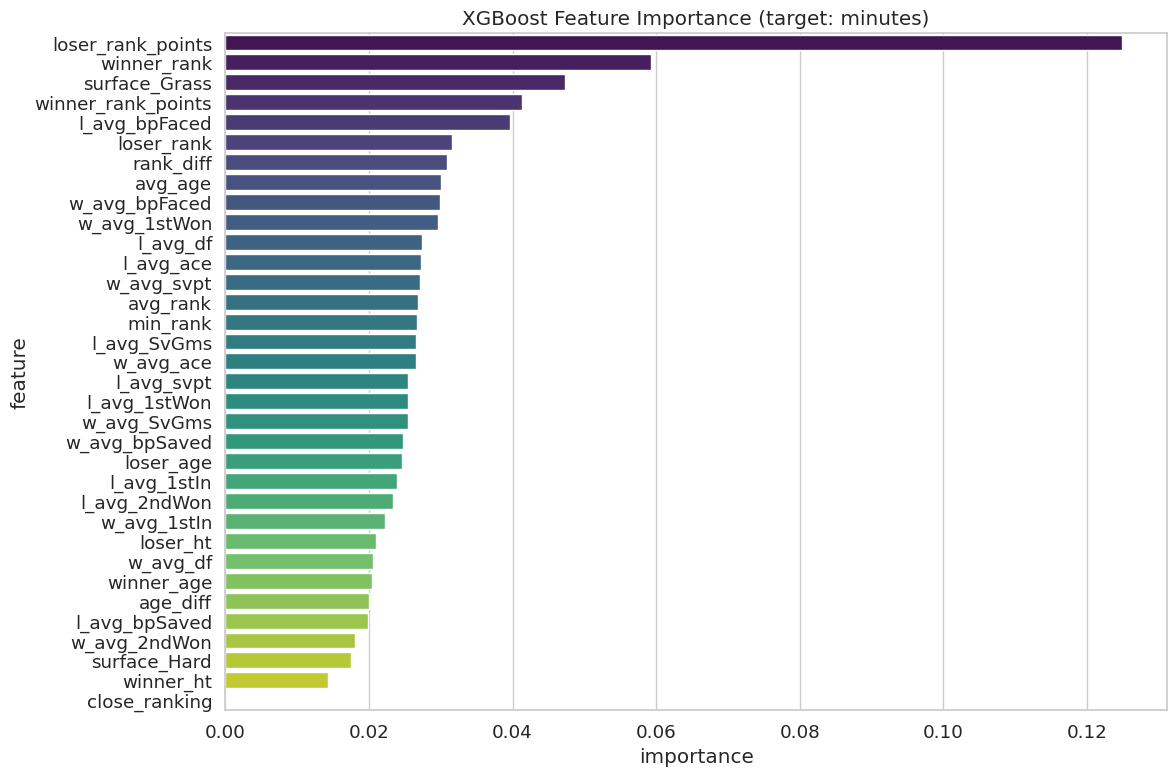

In [5]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Initialize and fit the model
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    n_jobs=-1
)

model.fit(X_no_outliers, y_no_outliers)

# Step 2: Extract feature importance
importance_df = pd.DataFrame({
    'feature': X_no_outliers.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Step 3: Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='importance', y='feature', palette='viridis')
plt.title('XGBoost Feature Importance (target: minutes)')
plt.tight_layout()
plt.show()
